# User-based collaborative filtering with cosine similarity

Recommend 12 items to returning customers who haven't purchased those items based on user-based collaborative filtering

- Use transaction data from 1st-7th day and 15th-21st day each month (2018-10 ~ 2020-08) to build user-based cosine similarity
- Use most similar customers(users) to identify 12 items that were not purchased by target customers
- 12 recommended items were validated using data from from 8th-14th (for 1st-7th data) and 22nd-28th (for 15th-21st data) day each month 
- calcuate AOP@12 and MAP@12 to evaluate results

In [1]:
import pandas as pd
import numpy as np
import collaborative_filter as cf

In [2]:
%%time
transaction_raw = pd.read_csv("../data/transactions_train.csv")

Wall time: 22 s


In [3]:
#set dates for training and testing
traintest_day = ['01','07','08','14','15','21','22','28']

In [4]:
eval_month = ['2018-10','2018-11','2018-12','2019-01']

In [9]:
eval_month = ['2019-02','2019-03','2019-04','2019-05']

In [14]:
eval_month = ['2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01']

In [19]:
eval_month = ['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08']

In [20]:
%%time

#empty list to store results
AOP_results = []
MAP_results = []
num_users = []

#main analysis for each period
for i in range(len(eval_month)): #i: 0-21
    for j in [0,4]: #j:0, 4
        
        mask_train = (transaction_raw.t_dat >= eval_month[i]+'-'+traintest_day[j]) & \
                     (transaction_raw.t_dat <= eval_month[i]+'-'+traintest_day[j+1])
        X_train = transaction_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
        mask_test = (transaction_raw.t_dat >= eval_month[i]+'-'+traintest_day[j+2]) & \
                    (transaction_raw.t_dat <= eval_month[i]+'-'+traintest_day[j+3])
        X_test = transaction_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
        
        #Get recommended items via user-based collaborative filtering
        recommend_items = cf.all_user_collaborative_filter(X_train.head(50000), 
                                                           similar_user_number = 200, max_recommend_items = 12)
        
        #calculate AOP@12 for each train-test group
        AOP12_cf, num_user = cf.AOP(recommend_items, X_test)
        AOP_results.append(AOP12_cf)
        
        #calculate MAP@12 for each train-test group
        MAP12_cf, num_user = cf.MAP(recommend_items, X_test)
        MAP_results.append(MAP12_cf)
        
        #append number of users
        num_users.append(num_user)

  0%|▏                                                                             | 33/15943 [00:00<00:50, 318.16it/s]

Number of users: 2347


100%|███████████████████████████████████████████████████████████████████████████| 15943/15943 [00:36<00:00, 432.18it/s]


Number of users: 2347


  0%|▏                                                                             | 50/15881 [00:00<00:32, 491.51it/s]

Number of users: 2539


100%|███████████████████████████████████████████████████████████████████████████| 15881/15881 [00:43<00:00, 361.64it/s]


Number of users: 2539


  0%|▎                                                                             | 65/14180 [00:00<00:24, 588.10it/s]

Number of users: 2167


100%|███████████████████████████████████████████████████████████████████████████| 14180/14180 [00:34<00:00, 411.97it/s]


Number of users: 2167


  0%|▎                                                                             | 46/13482 [00:00<00:32, 411.97it/s]

Number of users: 1827


100%|███████████████████████████████████████████████████████████████████████████| 13482/13482 [00:26<00:00, 513.76it/s]


Number of users: 1827


  0%|▏                                                                             | 26/12682 [00:00<00:50, 249.73it/s]

Number of users: 2246


100%|███████████████████████████████████████████████████████████████████████████| 12682/12682 [00:51<00:00, 248.47it/s]


Number of users: 2246


  0%|▎                                                                             | 53/12428 [00:00<00:23, 522.00it/s]

Number of users: 2072


100%|███████████████████████████████████████████████████████████████████████████| 12428/12428 [00:36<00:00, 340.70it/s]


Number of users: 2072


  0%|▏                                                                             | 25/12620 [00:00<00:55, 227.82it/s]

Number of users: 2358


100%|███████████████████████████████████████████████████████████████████████████| 12620/12620 [00:42<00:00, 297.64it/s]


Number of users: 2358


  0%|                                                                              | 20/14020 [00:00<01:18, 177.47it/s]

Number of users: 3097


100%|███████████████████████████████████████████████████████████████████████████| 14020/14020 [01:11<00:00, 195.36it/s]


Number of users: 3097


  0%|▏                                                                             | 25/13058 [00:00<00:58, 221.83it/s]

Number of users: 2352


100%|███████████████████████████████████████████████████████████████████████████| 13058/13058 [00:42<00:00, 308.98it/s]


Number of users: 2352


  0%|                                                                                | 7/14520 [00:00<03:49, 63.22it/s]

Number of users: 3945


100%|███████████████████████████████████████████████████████████████████████████| 14520/14520 [02:00<00:00, 120.98it/s]


Number of users: 3945


  0%|▏                                                                             | 36/14014 [00:00<00:39, 357.40it/s]

Number of users: 2645


100%|███████████████████████████████████████████████████████████████████████████| 14014/14014 [00:47<00:00, 298.00it/s]


Number of users: 2645


  0%|                                                                              | 14/15120 [00:00<01:58, 127.59it/s]

Number of users: 3049


100%|███████████████████████████████████████████████████████████████████████████| 15120/15120 [00:56<00:00, 268.58it/s]


Number of users: 3049


  0%|                                                                              | 22/14622 [00:00<01:18, 185.41it/s]

Number of users: 2861


100%|███████████████████████████████████████████████████████████████████████████| 14622/14622 [00:49<00:00, 292.70it/s]


Number of users: 2861


  0%|▏                                                                             | 38/15975 [00:00<00:46, 343.17it/s]

Number of users: 2938


100%|███████████████████████████████████████████████████████████████████████████| 15975/15975 [00:52<00:00, 307.08it/s]

Number of users: 2938
Wall time: 38min 45s


In [72]:
print("AOP size:", len(AOP_results))
print("MAP size:", len(MAP_results))

AOP size: 14
MAP size: 14


In [22]:
#create a timeline list for AOP and MAP
timeline = []
for month in eval_month:
    month_mid = month + '-15'
    month_late = month + '-22'
    timeline.append(month_mid)
    timeline.append(month_late)
timeline

['2020-02-15',
 '2020-02-22',
 '2020-03-15',
 '2020-03-22',
 '2020-04-15',
 '2020-04-22',
 '2020-05-15',
 '2020-05-22',
 '2020-06-15',
 '2020-06-22',
 '2020-07-15',
 '2020-07-22',
 '2020-08-15',
 '2020-08-22']

In [23]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
result_df.to_csv("../data/userCF_results4.csv")

result_df.head()

,timeline,AOP,MAP,num_users
0,2020-02-15,0.002414,0.003089,2347
1,2020-02-22,0.002855,0.003385,2539
2,2020-03-15,0.002384,0.003030,2167
3,2020-03-22,0.002919,0.003484,1827
4,2020-04-15,0.004638,0.004840,2246


In [36]:
#import result data
df1 = pd.read_csv("../data/userCF_50K/userCF_results1.csv").iloc[:,1:]
df2 = pd.read_csv("../data/userCF_50K/userCF_results2.csv").iloc[:,1:]
df3 = pd.read_csv("../data/userCF_50K/userCF_results3.csv").iloc[:,1:]
df4 = pd.read_csv("../data/userCF_50K/userCF_results4.csv").iloc[:,1:]

df_all = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)

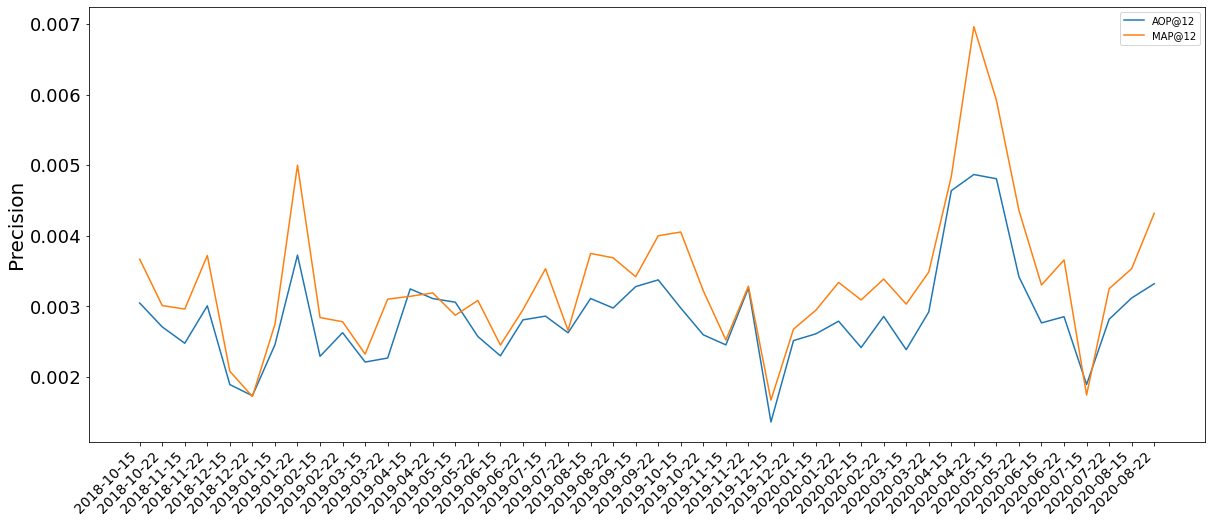

In [67]:
import matplotlib.pyplot as plt

plt.plot(df_all.timeline, df_all.AOP, label='AOP@12')
plt.plot(df_all.timeline, df_all.MAP, label='MAP@12')
plt.ylabel('Precision', fontsize=20)
plt.xticks(rotation=45, fontsize=14, ha='right')
plt.yticks(fontsize=18)
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]

In [70]:
#mean of AOP and MAP across 2018-2020
print("overall AOP@12 mean:", df_all.AOP.mean())
print("Overall MAP@12 mean:", df_all.MAP.mean())

overall AOP@12 mean: 0.002855023305518663
Overall MAP@12 mean: 0.0033310568927802696


In [71]:
df_all

,timeline,AOP,MAP,num_users
0,2018-10-15,0.003046,0.003667,2873
1,2018-10-22,0.002707,0.003010,2863
2,2018-11-15,0.002475,0.002960,2929
3,2018-11-22,0.003006,0.003719,4353
4,2018-12-15,0.001889,0.002077,2911
5,2018-12-22,0.001731,0.001721,3081
6,2019-01-15,0.002454,0.002744,2513
7,2019-01-22,0.003725,0.004999,2573
8,2019-02-15,0.002290,0.002839,2329
9,2019-02-22,0.002625,0.002780,3143
